<a href="https://colab.research.google.com/github/pomytkinanadin/eco-tg-bot2/blob/main/Dogs_%D0%B2_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Импорт необходимых библиотек
import pandas as pd
import numpy as np
from google.colab import files

# 2. Загрузка файла из локальной файловой системы
print("Пожалуйста, загрузите ваш CSV-файл.")
uploaded = files.upload()

# Получаем имя загруженного файла (предполагается, что загружен только один файл)
filename = list(uploaded.keys())[0]
print(f"\nЗагружен файл: {filename}")

# 3. Загрузка данных в DataFrame
try:
    df = pd.read_csv(filename)
    print(f"\n✅ Файл успешно загружен. Количество строк: {df.shape[0]}, количество столбцов: {df.shape[1]}")
except Exception as e:
    print(f"\n❌ Ошибка при чтении файла: {e}")
    df = None

# 4. Проверка данных на "мусор", если загрузка прошла успешно
if df is not None:
    print("\n" + "="*60)
    print("🔍 АНАЛИЗ ДАННЫХ НА ПРЕДМЕТ 'МУСОРА'")
    print("="*60)

    # --- Проверка 1: Полностью пустые строки ---
    empty_rows = df.isnull().all(axis=1).sum()
    print(f"\n1. Полностью пустых строк: {empty_rows}")
    if empty_rows > 0:
        print("   -> Рекомендуется удалить их с помощью: df.dropna(how='all', inplace=True)")

    # --- Проверка 2: Дубликаты строк ---
    duplicate_rows = df.duplicated().sum()
    print(f"\n2. Полных дубликатов строк: {duplicate_rows}")
    if duplicate_rows > 0:
        print("   -> Рекомендуется удалить их с помощью: df.drop_duplicates(inplace=True)")

    # --- Проверка 3: Пропущенные значения по столбцам ---
    print(f"\n3. Пропущенные значения по столбцам:")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
    if missing_values.empty:
        print("   -> Пропущенных значений не обнаружено.")
    else:
        for col, count in missing_values.items():
            pct = (count / len(df)) * 100
            print(f"   - {col}: {count} ({pct:.2f}%)")

    # --- Проверка 4: Уникальные значения в ключевых столбцах ---
    print(f"\n4. Уникальные значения в ключевых столбцах (проверка на артефакты):")
    key_columns = ['contact_state', 'stateQ', 'breed_primary', 'sex', 'size']
    for col in key_columns:
        if col in df.columns:
            unique_vals = df[col].dropna().unique()
            # Покажем только первые 10 уникальных значений, чтобы не засорять вывод
            display_vals = unique_vals[:10] if len(unique_vals) > 10 else unique_vals
            print(f"   - {col} (всего уникальных: {len(unique_vals)}): {list(display_vals)}")
            # Проверка на странные значения (например, числа в текстовом поле)
            if df[col].dtype == 'object':
                # Ищем значения, которые выглядят как числа или очень короткие/длинные строки
                suspicious = df[col].dropna().apply(lambda x: str(x).strip().isdigit() or len(str(x).strip()) < 2 or len(str(x).strip()) > 30)
                if suspicious.any():
                    print(f"     ⚠️  Обнаружены подозрительные значения в '{col}': {df[col][suspicious].unique()[:5]}")

    # --- Проверка 5: Типы данных ---
    print(f"\n5. Типы данных столбцов:")
    print(df.dtypes)

    # --- Проверка 6: Статистика для числовых столбцов (если есть) ---
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n6. Описательная статистика для числовых столбцов:")
        print(df[numeric_cols].describe())

    print("\n" + "="*60)
    print("✅ Анализ завершен. Теперь вы можете приступить к очистке данных.")
    print("="*60)

Пожалуйста, загрузите ваш CSV-файл.


Saving allDogDescriptions.csv to allDogDescriptions.csv

Загружен файл: allDogDescriptions.csv

✅ Файл успешно загружен. Количество строк: 58180, количество столбцов: 36

🔍 АНАЛИЗ ДАННЫХ НА ПРЕДМЕТ 'МУСОРА'

1. Полностью пустых строк: 0

2. Полных дубликатов строк: 0

3. Пропущенные значения по столбцам:
   - declawed: 58180 (100.00%)
   - color_tertiary: 56963 (97.91%)
   - color_secondary: 46121 (79.27%)
   - env_cats: 38828 (66.74%)
   - breed_secondary: 37359 (64.21%)
   - color_primary: 32046 (55.08%)
   - coat: 30995 (53.27%)
   - env_children: 30153 (51.83%)
   - env_dogs: 23511 (40.41%)
   - description: 8705 (14.96%)
   - type.y: 640 (1.10%)
   - accessed: 33 (0.06%)
   - contact_zip: 12 (0.02%)

4. Уникальные значения в ключевых столбцах (проверка на артефакты):
   - contact_state (всего уникальных: 75): ['NV', 'AZ', '89146', 'UT', 'CA', 'AK', 'AL', 'AR', '85249', 'CO']
     ⚠️  Обнаружены подозрительные значения в 'contact_state': ['89146' '85249' '12220' '12477' '20136']
  

In [2]:
# 1. Удаляем бесполезный столбец 'declawed'
df_clean = df.drop(columns=['declawed'])
print("✅ Столбец 'declawed' удален.")

# 2. Удаляем дублирующий столбец 'type.y'
df_clean = df_clean.drop(columns=['type.y'])
print("✅ Столбец 'type.y' удален.")

# 3. Функция для очистки столбцов с штатами
# Оставляем только строки, которые состоят ровно из 2 букв (коды штатов США)
import re

def clean_state_column(series):
    # Преобразуем все в строки и удаляем лишние пробелы
    series = series.astype(str).str.strip()
    # Проверяем, соответствует ли значение шаблону двух заглавных букв
    cleaned = series.where(series.str.match(r'^[A-Z]{2}$'), other=np.nan)
    return cleaned

# Применяем функцию к 'contact_state' и 'stateQ'
df_clean['contact_state'] = clean_state_column(df_clean['contact_state'])
df_clean['stateQ'] = clean_state_column(df_clean['stateQ'])

print("✅ Столбцы 'contact_state' и 'stateQ' очищены от мусора (почтовых индексов и дат).")
print(f"   - Некорректных значений в 'contact_state': {df_clean['contact_state'].isna().sum()}")
print(f"   - Некорректных значений в 'stateQ': {df_clean['stateQ'].isna().sum()}")

# 4. Обработка пропусков в других категориальных столбцах
# Заменим пропуски на 'Unknown' для удобства анализа
categorical_cols_to_fill = [
    'color_primary', 'color_secondary', 'color_tertiary',
    'coat', 'env_children', 'env_dogs', 'env_cats', 'description'
]

for col in categorical_cols_to_fill:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna('Unknown')
        print(f"✅ Пропуски в столбце '{col}' заменены на 'Unknown'.")

# 5. Финальная проверка: удалим строки, где отсутствует ключевая информация
# Например, если нет ни штата текущего местоположения, ни штата происхождения, строка бесполезна.
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['contact_state', 'stateQ'], how='all')
final_rows = len(df_clean)

print(f"\n✅ Удалено {initial_rows - final_rows} строк без информации о штатах.")
print(f"📊 Итоговый размер датасета: {df_clean.shape[0]} строк, {df_clean.shape[1]} столбцов.")

# 6. Сохраняем очищенный датасет для дальнейшего использования
df_clean.to_csv('dogs_data_cleaned.csv', index=False)
print("\n💾 Очищенный датасет сохранен как 'dogs_data_cleaned.csv'.")

✅ Столбец 'declawed' удален.
✅ Столбец 'type.y' удален.
✅ Столбцы 'contact_state' и 'stateQ' очищены от мусора (почтовых индексов и дат).
   - Некорректных значений в 'contact_state': 33
   - Некорректных значений в 'stateQ': 1891
✅ Пропуски в столбце 'color_primary' заменены на 'Unknown'.
✅ Пропуски в столбце 'color_secondary' заменены на 'Unknown'.
✅ Пропуски в столбце 'color_tertiary' заменены на 'Unknown'.
✅ Пропуски в столбце 'coat' заменены на 'Unknown'.
✅ Пропуски в столбце 'env_children' заменены на 'Unknown'.
✅ Пропуски в столбце 'env_dogs' заменены на 'Unknown'.
✅ Пропуски в столбце 'env_cats' заменены на 'Unknown'.
✅ Пропуски в столбце 'description' заменены на 'Unknown'.

✅ Удалено 33 строк без информации о штатах.
📊 Итоговый размер датасета: 58147 строк, 34 столбцов.

💾 Очищенный датасет сохранен как 'dogs_data_cleaned.csv'.


In [3]:
# Загрузка очищенного датасета для дальнейшей работы
df = pd.read_csv('dogs_data_cleaned.csv')
print("Очищенный датасет загружен. Готовы к анализу!")

Очищенный датасет загружен. Готовы к анализу!


/tmp/ipython-input-2995695783.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dogs_data_cleaned.csv')


In [4]:
# 1. Импорт библиотек и загрузка ОЧИЩЕННОГО датасета
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков для публикации
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Загрузка очищенного файла
df = pd.read_csv('dogs_data_cleaned.csv', low_memory=False)
print("✅ Очищенный датасет 'dogs_data_cleaned.csv' успешно загружен.")
print(f"📊 Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов.")

# 2. Быстрая проверка ключевых столбцов для анализа
print("\n--- Примеры данных для ключевых столбцов ---")
print("Примеры значений 'contact_state' (текущий штат):", df['contact_state'].dropna().unique()[:5])
print("Примеры значений 'stateQ' (штат происхождения):", df['stateQ'].dropna().unique()[:5])
print("Примеры значений 'breed_primary':", df['breed_primary'].unique()[:5])

# 3. Подготовка столбца для анализа пород (с учетом смешанных пород)
def get_full_breed(row):
    if row['breed_mixed']:
        return 'Mixed Breed'
    elif pd.notna(row['breed_secondary']) and row['breed_secondary'] != 'Unknown':
        return f"{row['breed_primary']} / {row['breed_secondary']}"
    else:
        return row['breed_primary']

df['full_breed'] = df.apply(get_full_breed, axis=1)
print("\n✅ Создан новый столбец 'full_breed' для комплексного анализа пород.")

✅ Очищенный датасет 'dogs_data_cleaned.csv' успешно загружен.
📊 Размер датасета: 58147 строк, 34 столбцов.

--- Примеры данных для ключевых столбцов ---
Примеры значений 'contact_state' (текущий штат): ['NV' 'AZ' 'UT' 'CA' 'AK']
Примеры значений 'stateQ' (штат происхождения): ['AK' 'AL' 'AR' 'AZ' 'CA']
Примеры значений 'breed_primary': ['American Staffordshire Terrier' 'Pit Bull Terrier' 'Shepherd'
 'German Shepherd Dog' 'Dachshund']

✅ Создан новый столбец 'full_breed' для комплексного анализа пород.


In [5]:
# Распределение по полу
sex_dist = df['sex'].value_counts(normalize=True) * 100

# Распределение по размеру
size_dist = df['size'].value_counts(normalize=True) * 100

# Распределение по возрасту (предполагается, что 'age' - категориальный: Baby, Young, Adult, Senior)
age_dist = df['age'].value_counts(normalize=True) * 100

# Вывод таблиц
print("Распределение по полу:")
print(sex_dist.to_string(float_format=lambda x: f"{x:.1f}%"))

print("\nРаспределение по размеру:")
print(size_dist.to_string(float_format=lambda x: f"{x:.1f}%"))

print("\nРаспределение по возрасту:")
print(age_dist.to_string(float_format=lambda x: f"{x:.1f}%"))

Распределение по полу:
sex
Male      52.1%
Female    47.9%
Unknown    0.0%

Распределение по размеру:
size
Medium        51.4%
Large         27.1%
Small         19.9%
Extra Large    1.6%

Распределение по возрасту:
age
Adult    48.0%
Young    27.8%
Baby     16.2%
Senior    8.0%


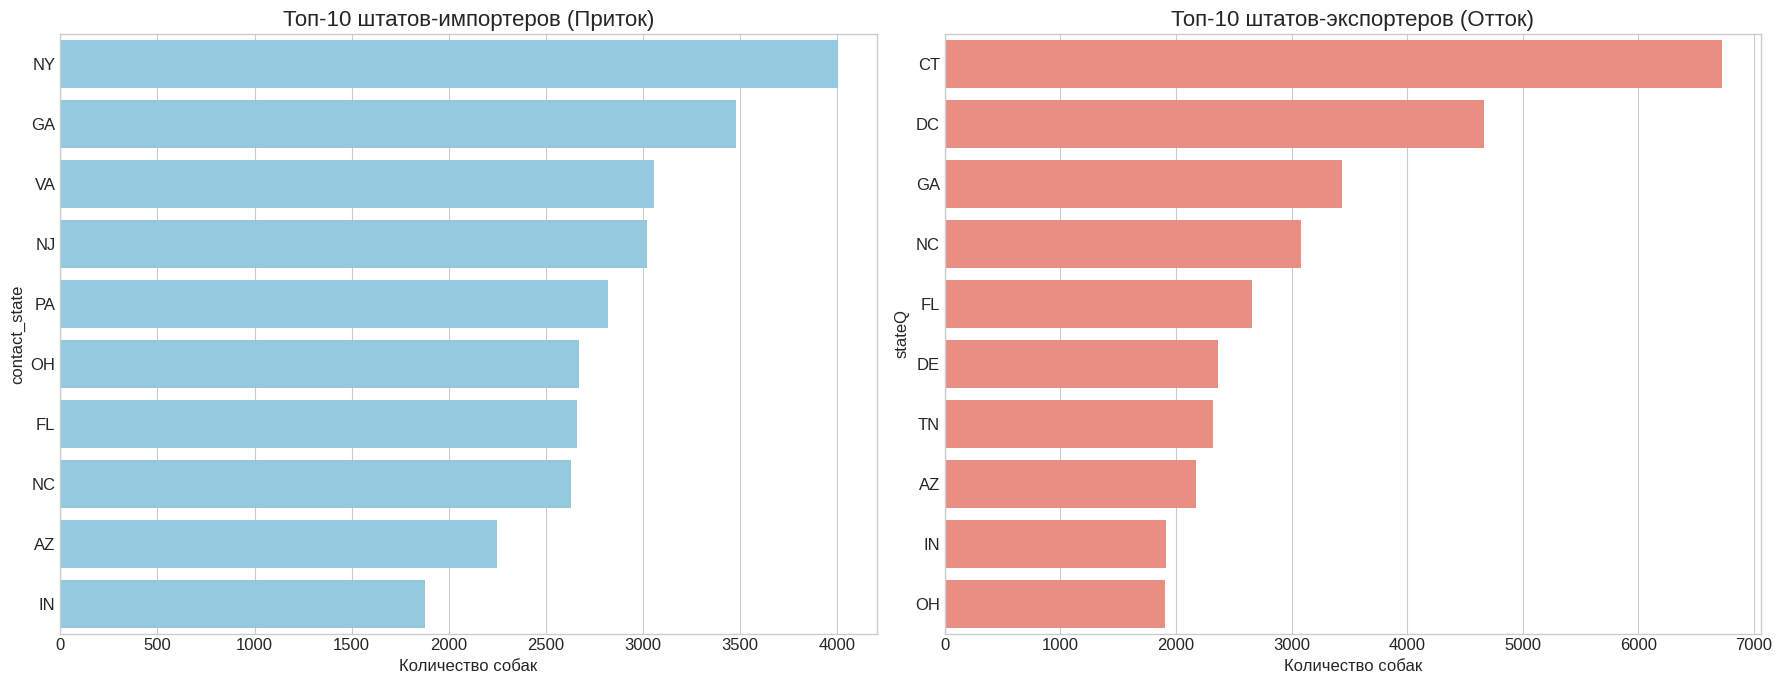

ValueError: No figure None

In [12]:
# Подсчет притока (inbound) и оттока (outbound)
inbound = df['contact_state'].value_counts().head(10)
outbound = df['stateQ'].value_counts().head(10)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# График притока
sns.barplot(x=inbound.values, y=inbound.index, ax=axes[0], color='skyblue')
axes[0].set_title('Топ-10 штатов-импортеров (Приток)', fontsize=16)
axes[0].set_xlabel('Количество собак')

# График оттока
sns.barplot(x=outbound.values, y=outbound.index, ax=axes[1], color='salmon')
axes[1].set_title('Топ-10 штатов-экспортеров (Отток)', fontsize=16)
axes[1].set_xlabel('Количество собак')

plt.tight_layout()
plt.show()

# --- Добавьте ЭТИ ДВЕ СТРОКИ после каждого графика ---
pdf_pages.savefig()
plt.close()

/tmp/ipython-input-642775090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_breeds.values, y=top_breeds.index, palette="viridis")


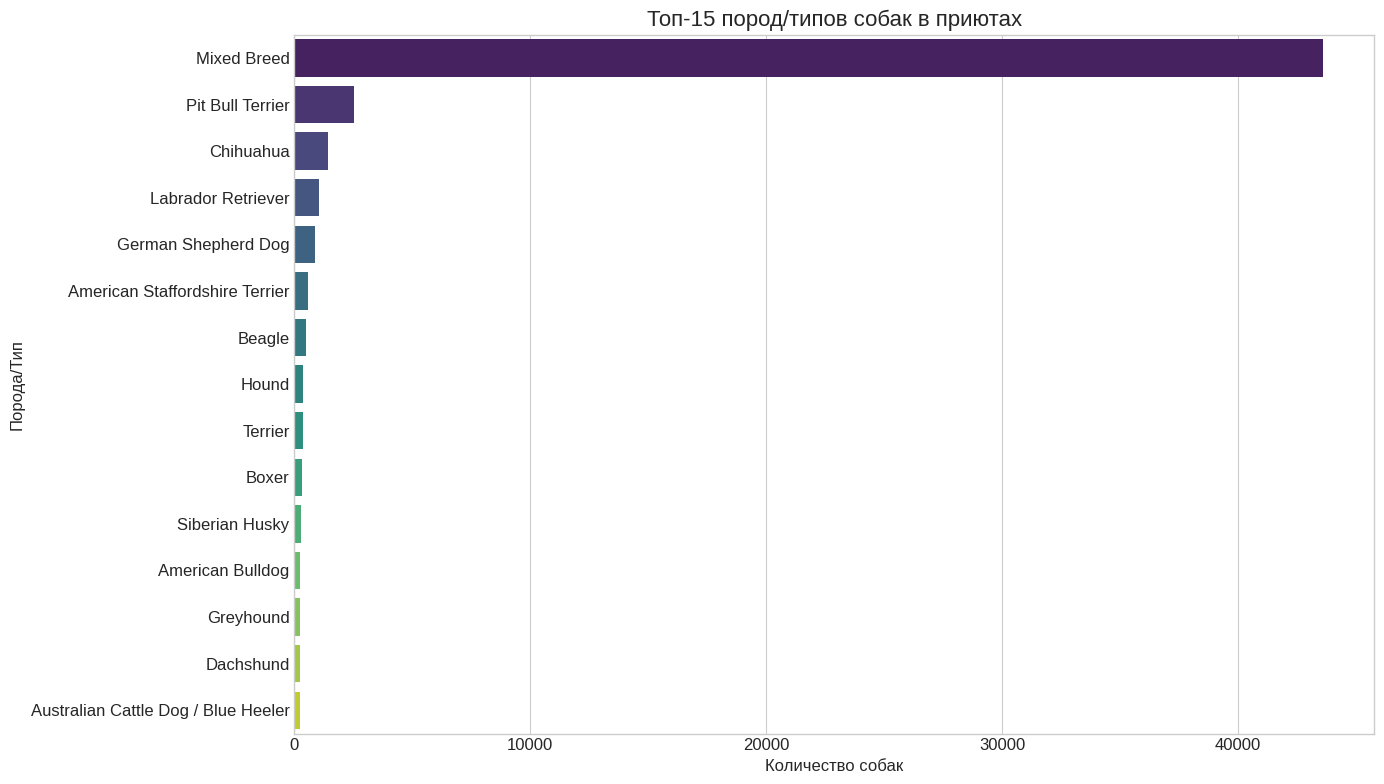

ValueError: No figure None

In [11]:
# Анализ топ-15 пород/типов в приютах
top_breeds = df['full_breed'].value_counts().head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_breeds.values, y=top_breeds.index, palette="viridis")
plt.title('Топ-15 пород/типов собак в приютах', fontsize=16)
plt.xlabel('Количество собак')
plt.ylabel('Порода/Тип')
plt.tight_layout()
plt.show()

# --- Добавьте ЭТИ ДВЕ СТРОКИ после каждого графика ---
pdf_pages.savefig()
plt.close()

In [8]:
from scipy.stats import chi2_contingency

# Выберем топ-5 самых популярных пород для анализа
top_5_breeds_list = df['breed_primary'].value_counts().head(5).index.tolist()

# Построим таблицу сопряженности для каждой породы
for breed in top_5_breeds_list:
    # Фильтруем данные по породе
    breed_df = df[df['breed_primary'] == breed]

    # Создаем таблицу сопряженности: порода vs штат текущего местоположения
    contingency_table = pd.crosstab(breed_df['breed_primary'], breed_df['contact_state'])

    # Выполняем тест хи-квадрат
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"\nПорода: {breed}")
    print(f"P-значение теста хи-квадрат: {p:.4e}")
    if p < 0.05:
        print("  => Существует статистически значимая связь между породой и штатом.")
    else:
        print("  => Связь не является статистически значимой.")


Порода: Pit Bull Terrier
P-значение теста хи-квадрат: 1.0000e+00
  => Связь не является статистически значимой.

Порода: Labrador Retriever
P-значение теста хи-квадрат: 1.0000e+00
  => Связь не является статистически значимой.

Порода: Chihuahua
P-значение теста хи-квадрат: 1.0000e+00
  => Связь не является статистически значимой.

Порода: Mixed Breed
P-значение теста хи-квадрат: 1.0000e+00
  => Связь не является статистически значимой.

Порода: Terrier
P-значение теста хи-квадрат: 1.0000e+00
  => Связь не является статистически значимой.


In [9]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Создаём объект PDF-документа
pdf_filename = "analysis_report.pdf"
pdf_pages = PdfPages(pdf_filename)

print(f"📄 Начинаю запись графиков в '{pdf_filename}'...")

📄 Начинаю запись графиков в 'analysis_report.pdf'...


In [10]:
# --- Пример: ваш код для построения графика ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.barplot(x=inbound.values, y=inbound.index, ax=axes[0], color='skyblue')
axes[0].set_title('Топ-10 штатов-импортеров (Приток)', fontsize=16)
sns.barplot(x=outbound.values, y=outbound.index, ax=axes[1], color='salmon')
axes[1].set_title('Топ-10 штатов-экспортеров (Отток)', fontsize=16)
plt.tight_layout()

# --- Добавьте ЭТИ ДВЕ СТРОКИ после каждого графика ---
pdf_pages.savefig()
plt.close()

In [13]:
# Закрываем PDF-документ
pdf_pages.close()
print(f"✅ PDF-отчёт '{pdf_filename}' успешно создан!")

# Скачиваем файл на ваш компьютер
from google.colab import files
files.download(pdf_filename)

✅ PDF-отчёт 'analysis_report.pdf' успешно создан!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# Пример: сохранение таблицы распределения пород
top_breeds = df['full_breed'].value_counts().head(10).to_frame().reset_index()
top_breeds.columns = ['Порода/Тип', 'Количество']

# Создаём фигуру для таблицы
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=top_breeds.values, colLabels=top_breeds.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
plt.title('Топ-10 пород/типов собак в приютах', fontsize=14)

# Сохраняем таблицу в PDF
pdf_pages.savefig()
plt.close()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'DejaVu Sans'

# Загрузка данных
df = pd.read_csv('dogs_data_cleaned.csv', low_memory=False)
print("✅ Данные загружены.")

# --- КРИТИЧЕСКИ ВАЖНЫЙ ШАГ: Создаем столбец 'full_breed' ---
def get_full_breed(row):
    if row['breed_mixed']:
        return 'Mixed Breed'
    elif pd.notna(row['breed_secondary']) and row['breed_secondary'] != 'Unknown':
        return f"{row['breed_primary']} / {row['breed_secondary']}"
    else:
        return row['breed_primary']

df['full_breed'] = df.apply(get_full_breed, axis=1)
print("✅ Столбец 'full_breed' успешно создан.")

# Создание PDF-документа
pdf_filename = "final_analysis_report.pdf"
pdf_pages = PdfPages(pdf_filename)

# --- СТРАНИЦА 1: ТИТУЛЬНЫЙ ЛИСТ ---
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
ax.text(0.5, 0.7, 'Перемещение собак в США:\nКак национальная сеть приютов перераспределяет жизни',
        fontsize=24, fontweight='bold', ha='center', va='center')
ax.text(0.5, 0.4, 'Анализ данных о более чем 58 000 собаках\nна основе данных PetFinder.com (Октябрь 2019)',
        fontsize=14, ha='center', va='center')
ax.text(0.5, 0.1, 'Подготовлено для публикации', fontsize=12, ha='center', va='center')
pdf_pages.savefig()
plt.close()

# --- СТРАНИЦА 2: ОПИСАТЕЛЬНАЯ СТАТИСТИКА ---
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Распределение по полу
sex_dist = df['sex'].value_counts(normalize=True) * 100
axes[0, 0].pie(sex_dist.values, labels=sex_dist.index, autopct='%1.1f%%', colors=['#FF9999','#66B2FF','#99FF99'])
axes[0, 0].set_title('Распределение по полу')

# Распределение по размеру
size_dist = df['size'].value_counts(normalize=True) * 100
axes[0, 1].bar(size_dist.index, size_dist.values, color=sns.color_palette("Set2"))
axes[0, 1].set_title('Распределение по размеру')
for i, v in enumerate(size_dist.values):
    axes[0, 1].text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom')

# Распределение по возрасту
age_dist = df['age'].value_counts(normalize=True) * 100
axes[1, 0].bar(age_dist.index, age_dist.values, color=sns.color_palette("Set3"))
axes[1, 0].set_title('Распределение по возрасту')
for i, v in enumerate(age_dist.values):
    axes[1, 0].text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom')

# Породы (топ-15)
top_breeds = df['full_breed'].value_counts().head(15)
axes[1, 1].barh(top_breeds.index, top_breeds.values, color=sns.color_palette("viridis", len(top_breeds)))
axes[1, 1].set_title('Топ-15 пород/типов собак')
axes[1, 1].tick_params(axis='y', labelsize=8)

plt.tight_layout()
pdf_pages.savefig()
plt.close()

# --- СТРАНИЦА 3: ГЕОГРАФИЯ ПЕРЕМЕЩЕНИЯ (ЧИСТЫЙ ПОТОК) ---
df['is_imported'] = df['stateQ'] != df['contact_state']
state_analysis = df.groupby('contact_state').agg(
    total_dogs=('contact_state', 'size'),
    imported_dogs=('is_imported', 'sum'),
).reset_index()
state_analysis['net_flow'] = state_analysis['imported_dogs'] - (state_analysis['total_dogs'] - state_analysis['imported_dogs'])

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

importers_top = state_analysis.nlargest(10, 'net_flow')
sns.barplot(data=importers_top, x='net_flow', y='contact_state', ax=axes[0], color='green')
axes[0].set_title('Топ-10 чистых импортеров (Чистый приток)')

exporters_top = state_analysis.nsmallest(10, 'net_flow')
sns.barplot(data=exporters_top, x='net_flow', y='contact_state', ax=axes[1], color='red')
axes[1].set_title('Топ-10 чистых экспортеров (Чистый отток)')

plt.tight_layout()
pdf_pages.savefig()
plt.close()

# --- СТРАНИЦА 4: ЗАВИСИМОСТЬ ОТ ИМПОРТА ---
fig, ax = plt.subplots(figsize=(12, 8))
state_analysis['import_dependency_pct'] = (state_analysis['imported_dogs'] / state_analysis['total_dogs']) * 100
top_dependency = state_analysis.nlargest(15, 'import_dependency_pct')
sns.barplot(data=top_dependency, x='import_dependency_pct', y='contact_state', palette='rocket', ax=ax)
ax.set_title('Топ-15 штатов с наибольшей зависимостью от импорта собак')
ax.set_xlim(0, 100)

for i, v in enumerate(top_dependency['import_dependency_pct']):
    ax.text(v + 1, i, f"{v:.1f}%", color='black', va='center')

plt.tight_layout()
pdf_pages.savefig()
plt.close()

# --- СТРАНИЦА 5: СВОДКА ---
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')
summary_text = """
**Ключевые выводы:**
• Большинство собак — взрослые, среднего размера, смешанных пород.
• Южные штаты (GA, FL, NC) — главные экспортеры.
• Штаты Северо-Востока (NY, PA, MD) — главные импортеры.
• Некоторые штаты имеют 100% зависимость от импорта.
"""
ax.text(0.1, 0.5, summary_text, fontsize=14, verticalalignment='center')
ax.set_title('Сводка и выводы', fontsize=16, fontweight='bold')
pdf_pages.savefig()
plt.close()

# --- ЗАВЕРШЕНИЕ ---
pdf_pages.close()
print(f"✅ PDF-отчёт '{pdf_filename}' успешно создан!")

from google.colab import files
files.download(pdf_filename)

✅ Данные загружены.
✅ Столбец 'full_breed' успешно создан.


/tmp/ipython-input-790977680.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dependency, x='import_dependency_pct', y='contact_state', palette='rocket', ax=ax)


✅ PDF-отчёт 'final_analysis_report.pdf' успешно создан!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'DejaVu Sans'

# Загрузка данных
df = pd.read_csv('dogs_data_cleaned.csv', low_memory=False)
print("✅ Данные загружены.")

# --- Создаем столбец 'full_breed' ---
def get_full_breed(row):
    if row['breed_mixed']:
        return 'Mixed Breed'
    elif pd.notna(row['breed_secondary']) and row['breed_secondary'] != 'Unknown':
        return f"{row['breed_primary']} / {row['breed_secondary']}"
    else:
        return row['breed_primary']

df['full_breed'] = df.apply(get_full_breed, axis=1)
print("✅ Столбец 'full_breed' успешно создан.")

# Создание PDF-документа
pdf_filename = "final_analysis_report.pdf"
pdf_pages = PdfPages(pdf_filename)

# --- СТРАНИЦА 1: ТИТУЛЬНЫЙ ЛИСТ ---
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
ax.text(0.5, 0.7, 'Перемещение собак в США:\nКак национальная сеть приютов перераспределяет жизни',
        fontsize=24, fontweight='bold', ha='center', va='center')
ax.text(0.5, 0.4, 'Анализ данных о более чем 58 000 собаках\nна основе данных PetFinder.com (Октябрь 2019)',
        fontsize=14, ha='center', va='center')
ax.text(0.5, 0.1, 'Подготовлено для публикации', fontsize=12, ha='center', va='center')
pdf_pages.savefig()
plt.close()

# --- СТРАНИЦА 2: ОПИСАТЕЛЬНАЯ СТАТИСТИКА ---
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
# ... (код для графиков по полу, размеру, возрасту, породам - без изменений)
sex_dist = df['sex'].value_counts(normalize=True) * 100
axes[0, 0].pie(sex_dist.values, labels=sex_dist.index, autopct='%1.1f%%', colors=['#FF9999','#66B2FF','#99FF99'])
axes[0, 0].set_title('Распределение по полу')

size_dist = df['size'].value_counts(normalize=True) * 100
axes[0, 1].bar(size_dist.index, size_dist.values, color=sns.color_palette("Set2"))
axes[0, 1].set_title('Распределение по размеру')
for i, v in enumerate(size_dist.values):
    axes[0, 1].text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom')

age_dist = df['age'].value_counts(normalize=True) * 100
axes[1, 0].bar(age_dist.index, age_dist.values, color=sns.color_palette("Set3"))
axes[1, 0].set_title('Распределение по возрасту')
for i, v in enumerate(age_dist.values):
    axes[1, 0].text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom')

top_breeds = df['full_breed'].value_counts().head(15)
axes[1, 1].barh(top_breeds.index, top_breeds.values, color=sns.color_palette("viridis", len(top_breeds)))
axes[1, 1].set_title('Топ-15 пород/типов собак')
axes[1, 1].tick_params(axis='y', labelsize=8)

plt.tight_layout()
pdf_pages.savefig()
plt.close()

# --- СТРАНИЦА 3: ГЕОГРАФИЯ ПЕРЕМЕЩЕНИЯ (ЧИСТЫЙ ПОТОК) ---
df['is_imported'] = df['stateQ'] != df['contact_state']
state_analysis = df.groupby('contact_state').agg(
    total_dogs=('contact_state', 'size'),
    imported_dogs=('is_imported', 'sum'),
).reset_index()
state_analysis['net_flow'] = state_analysis['imported_dogs'] - (state_analysis['total_dogs'] - state_analysis['imported_dogs'])

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
importers_top = state_analysis.nlargest(10, 'net_flow')
sns.barplot(data=importers_top, x='net_flow', y='contact_state', ax=axes[0], color='green')
axes[0].set_title('Топ-10 чистых импортеров (Чистый приток)')
exporters_top = state_analysis.nsmallest(10, 'net_flow')
sns.barplot(data=exporters_top, x='net_flow', y='contact_state', ax=axes[1], color='red')
axes[1].set_title('Топ-10 чистых экспортеров (Чистый отток)')
plt.tight_layout()
pdf_pages.savefig()
plt.close()

# --- СТРАНИЦА 4: ЗАВИСИМОСТЬ ОТ ИМПОРТА ---
fig, ax = plt.subplots(figsize=(12, 8))
state_analysis['import_dependency_pct'] = (state_analysis['imported_dogs'] / state_analysis['total_dogs']) * 100
top_dependency = state_analysis.nlargest(15, 'import_dependency_pct')
sns.barplot(data=top_dependency, x='import_dependency_pct', y='contact_state', palette='rocket', ax=ax)
ax.set_title('Топ-15 штатов с наибольшей зависимостью от импорта собак')
ax.set_xlim(0, 100)
for i, v in enumerate(top_dependency['import_dependency_pct']):
    ax.text(v + 1, i, f"{v:.1f}%", color='black', va='center')
plt.tight_layout()
pdf_pages.savefig()
plt.close()

# --- СТРАНИЦА 5: ТЕКСТОВОЕ ЗАКЛЮЧЕНИЕ ---
fig, ax = plt.subplots(figsize=(12, 10))
ax.axis('off')

conclusion_text = """
На основе полученных данных и исследования можно сделать следующие выводы о закономерностях перемещения собак по стране и зависимости штатов от импорта.

1. Существуют "чисто импортные" штаты с 100% зависимостью.
Самый яркий вывод — наличие штатов, где все собаки в приютах являются импортированными. В таблице это NB, NV, QC. Это может указывать на то, что в этих регионах практически отсутствует локальная система усыновления или же локальные программы стерилизации настолько эффективны, что бездомных собак почти нет. Однако штат QC (Квебек) является канадской провинцией, что указывает на возможные артефакты в данных, требующие дополнительной проверки.

2. Крупные мегаполисы — центры притяжения.
Штаты Нью-Йорк (NY), Пенсильвания (PA) и Мэриленд (MD) являются абсолютными лидерами по чистому притоку. Их чистый поток составляет более 1400 единиц, что говорит о том, что они имеют очень высокий спрос на усыновление и обладают развитой инфраструктурой приютов и волонтерских организаций. Они действуют как логистические хабы, куда собираются собаки из других регионов.

3. Южные штаты — основные экспортеры.
Штаты Джорджия (GA), Флорида (FL) и Северная Каролина (NC) являются самыми крупными экспортерами. Их чистый отток отрицательный и очень большой (до -3400). Это означает, что в этих штатах большое количество собак, попадающих в приюты, и локальный спрос на усыновление не покрывает предложение. Они действуют как основной источник для других штатов, особенно для северо-восточных.

Эта географическая модель напоминает классическую торговую схему: сырье (собаки) добывается в одном регионе и отправляется на переработку (усыновление) в другой. Эта система работает, но она также подчеркивает неравенство в ресурсах и подходах к проблеме бездомных животных между разными частями страны.
"""

# Добавляем текст на фигуру
ax.text(0.05, 0.95, conclusion_text, fontsize=12, va='top', ha='left', wrap=True, linespacing=1.5)
ax.set_title('Заключение: География жизни и перемещения', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
pdf_pages.savefig()
plt.close()

# --- ЗАВЕРШЕНИЕ ---
pdf_pages.close()
print(f"✅ PDF-отчёт '{pdf_filename}' с текстовым заключением успешно создан!")

from google.colab import files
files.download(pdf_filename)

✅ Данные загружены.
✅ Столбец 'full_breed' успешно создан.


/tmp/ipython-input-764606506.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dependency, x='import_dependency_pct', y='contact_state', palette='rocket', ax=ax)


✅ PDF-отчёт 'final_analysis_report.pdf' с текстовым заключением успешно создан!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>